In [4]:
import statsmodels.api as sm
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import plotly.express as px

url = 'E:\\Dessertation\\desertion_dkit_msc_2022_sep\\output.csv'

df = pd.read_csv(url)
df.tail()

,country,year,sex,age,suicides,population,sucid_in_hundredk,country-year,yearly_hdi,yearly_gdp,...,legalrights,laborforcetotal,lifeexpectancy,mobilesubscriptionsp100,refugees,selfemployed,electricityacess,secondarycompletion,continent,country_code
13271,Ukraine,2015,female,35-54 years,427,6309963,6.77,Ukraine2015,NaN,9.103096e+10,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Europe,UKR
13272,Ukraine,2015,female,15-24 years,117,2281055,5.13,Ukraine2015,NaN,9.103096e+10,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Europe,UKR
13273,Ukraine,2015,female,25-34 years,168,3421535,4.91,Ukraine2015,NaN,9.103096e+10,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Europe,UKR
13274,Ukraine,2015,male,5-14 years,33,2131084,1.55,Ukraine2015,NaN,9.103096e+10,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Europe,UKR
13275,Ukraine,2015,female,5-14 years,19,2010824,0.94,Ukraine2015,NaN,9.103096e+10,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Europe,UKR


In [5]:
# Create the bar plot

fig = px.bar(df,x='year',y='suicides',color='continent',title='Suicides by Continent',)

# Show the plot
fig.show()

In [6]:
df.head()

,country,year,sex,age,suicides,population,sucid_in_hundredk,country-year,yearly_hdi,yearly_gdp,...,legalrights,laborforcetotal,lifeexpectancy,mobilesubscriptionsp100,refugees,selfemployed,electricityacess,secondarycompletion,continent,country_code
0,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,0.694,8.841667e+10,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Americas,ARG
1,Argentina,1985,male,55-74 years,485,1997000,24.29,Argentina1985,0.694,8.841667e+10,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Americas,ARG
2,Argentina,1985,male,35-54 years,414,3346300,12.37,Argentina1985,0.694,8.841667e+10,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Americas,ARG
3,Argentina,1985,female,55-74 years,210,2304000,9.11,Argentina1985,0.694,8.841667e+10,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Americas,ARG
4,Argentina,1985,male,25-34 years,177,2234200,7.92,Argentina1985,0.694,8.841667e+10,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Americas,ARG


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13276 entries, 0 to 13275
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  13276 non-null  object 
 1   year                     13276 non-null  int64  
 2   sex                      13276 non-null  object 
 3   age                      13276 non-null  object 
 4   suicides                 13276 non-null  int64  
 5   population               13276 non-null  int64  
 6   sucid_in_hundredk        13276 non-null  float64
 7   country-year             13276 non-null  object 
 8   yearly_hdi               4152 non-null   float64
 9   yearly_gdp               13276 non-null  float64
 10  gdp_per_capita           13276 non-null  int64  
 11  generation               13276 non-null  object 
 12  suicide%                 13276 non-null  float64
 13  internetusers            13192 non-null  float64
 14  expenses              

In [8]:
## Animation frame

#create coloured region map by lifeExp
fig= px.choropleth(df,               
              locations="country_code", color="gdp_per_capita",
              hover_name="country",  
              animation_frame="year")
fig.show()

In [9]:
## Animation frame

#create coloured region map by lifeExp
fig= px.choropleth(df,               
              locations="country_code", color="suicides",
              hover_name="country",  
              animation_frame="year")
fig.show()

In [10]:
dff=df.groupby(["country"], as_index=False)[["sucid_in_hundredk","gdp_per_capita"]].mean()

scatterplot = px.scatter(
        data_frame=dff,
        x="sucid_in_hundredk",
        y="gdp_per_capita",
        hover_data=['country'],
        text="country",
        height=540    )
scatterplot.show()

In [11]:
# df1 = df.set_index('year')

In [12]:
# df.groupby(lambda x: x.year)['sucid_in_hundredk'].agg(['sum', 'mean', 'max'])

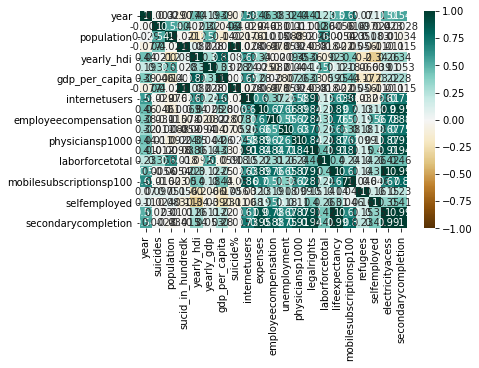

In [13]:
correlations = df.corr()

sns.heatmap(correlations, center=0, annot=True, vmin=-1, vmax=1, cmap="BrBG")
plt.show()

Text(0.5, 0, 'Suicides per 100K')

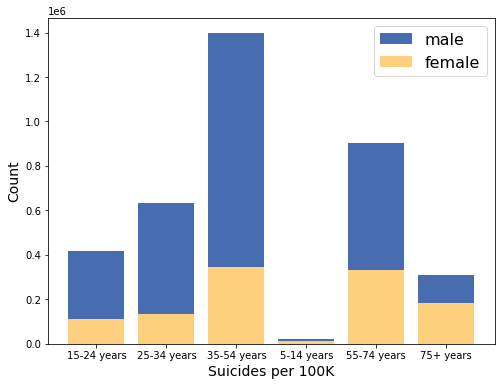

In [14]:
col = plt.cm.Spectral(np.linspace(0, 1, 20))

plt.figure(figsize=(8, 6))

agedistf = pd.DataFrame(df.groupby('sex').get_group('female').groupby('age').suicides.sum())

agedistm = pd.DataFrame(df.groupby('sex').get_group('male').groupby('age').suicides.sum())

plt.bar(agedistm.index, agedistm.suicides, color=col[18])
plt.bar(agedistf.index, agedistf.suicides, color=col[7])
plt.legend(['male', 'female'], fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Suicides per 100K', fontsize=14)

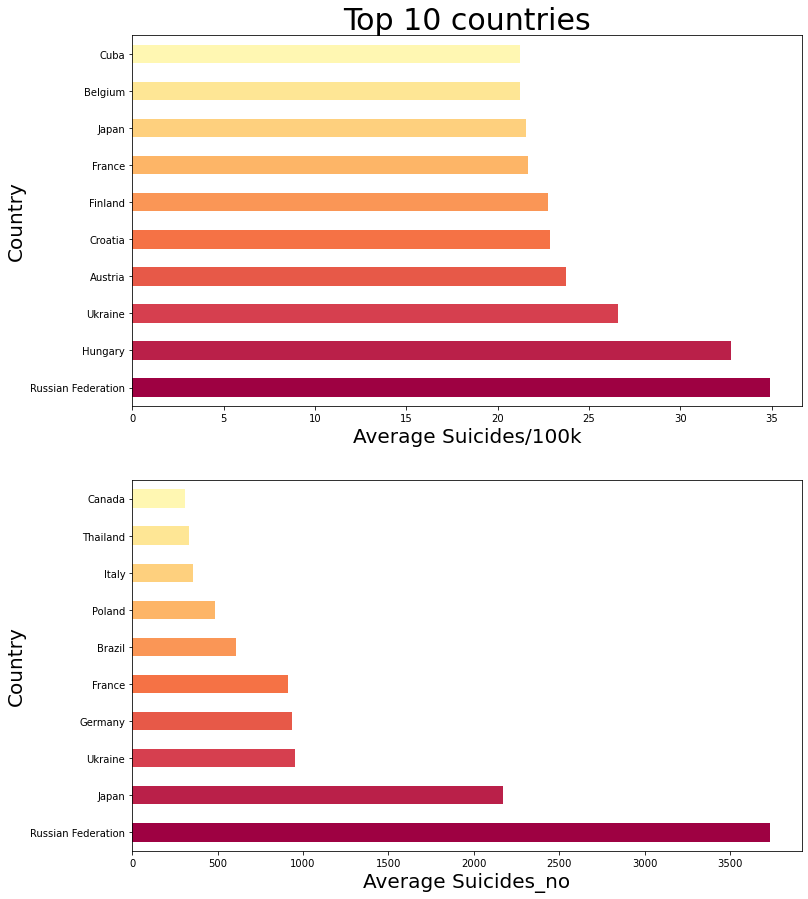

In [15]:
plt.figure(figsize=(12, 15))

col = plt.cm.Spectral(np.linspace(0, 1, 20))
plt.subplot(211)
df.groupby(['country']).sucid_in_hundredk.mean().nlargest(10).plot(kind='barh', color=col)
plt.xlabel('Average Suicides/100k', size=20)
plt.ylabel('Country', fontsize=20)
plt.title('Top 10 countries', fontsize=30)

plt.subplot(212)
df.groupby(['country']).suicides.mean().nlargest(10).plot(kind='barh', color=col)
plt.xlabel('Average Suicides_no', size=20)
plt.ylabel('Country', fontsize=20);

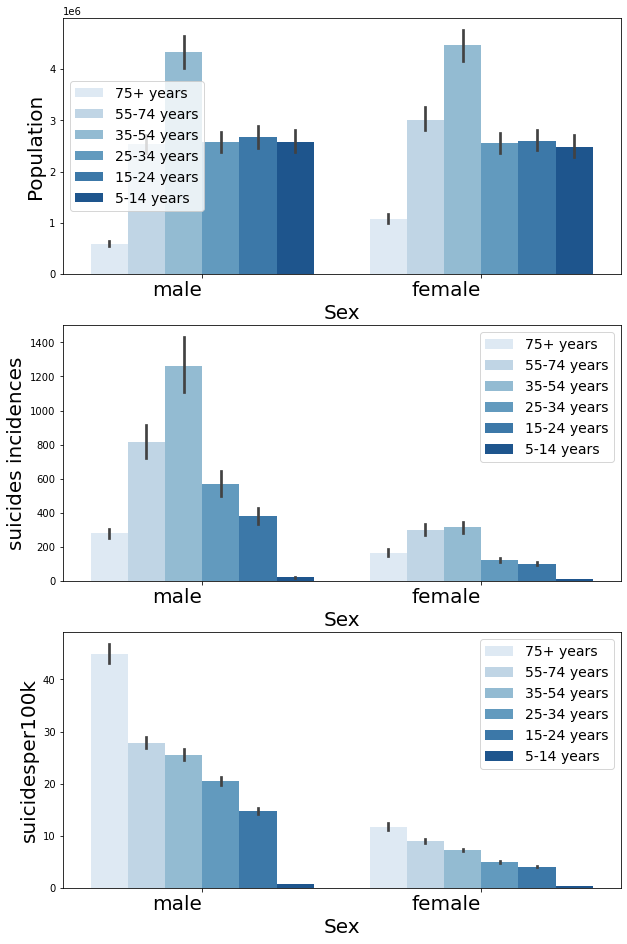

In [16]:
import seaborn as sns
plt.figure(figsize=(10, 16))

plt.subplot(311)

sns.barplot(x='sex', y='population', hue='age', data=df, palette="Blues")
plt.xticks(ha='right', fontsize=20)
plt.ylabel('Population', fontsize=20)
plt.xlabel('Sex', fontsize=20)
plt.legend(fontsize=14, loc='best')

plt.subplot(313)

sns.barplot(x='sex', y='sucid_in_hundredk', hue='age', data=df,palette="Blues")
plt.xticks(ha='right', fontsize=20);
plt.ylabel('suicidesper100k',fontsize=20);
plt.xlabel('Sex',fontsize=20);
plt.legend(fontsize=14);

plt.subplot(312)
sns.barplot(x='sex', y='suicides', hue='age', data=df, palette="Blues")
plt.xticks(ha='right', fontsize=20)
plt.ylabel('suicides incidences', fontsize=20)
plt.xlabel('Sex', fontsize=20)
plt.legend(fontsize=14)

Text(0, 0.5, 'Total number of suicides in the world')

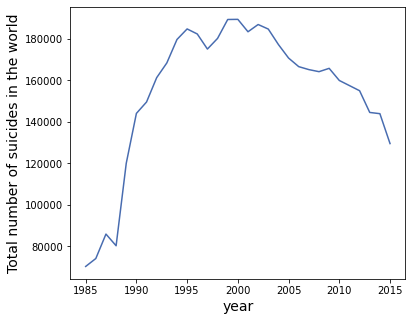

In [17]:
year = df.groupby('year').year.unique()

plt.figure(figsize=(6, 5))

totalpyear = pd.DataFrame(df.groupby('year').suicides.sum())

plt.plot(year.index[0:31], totalpyear[0:31], color=col[18])
plt.xlabel('year', fontsize=14)
plt.ylabel('Total number of suicides in the world', fontsize=14)

Text(0, 0.5, 'count')

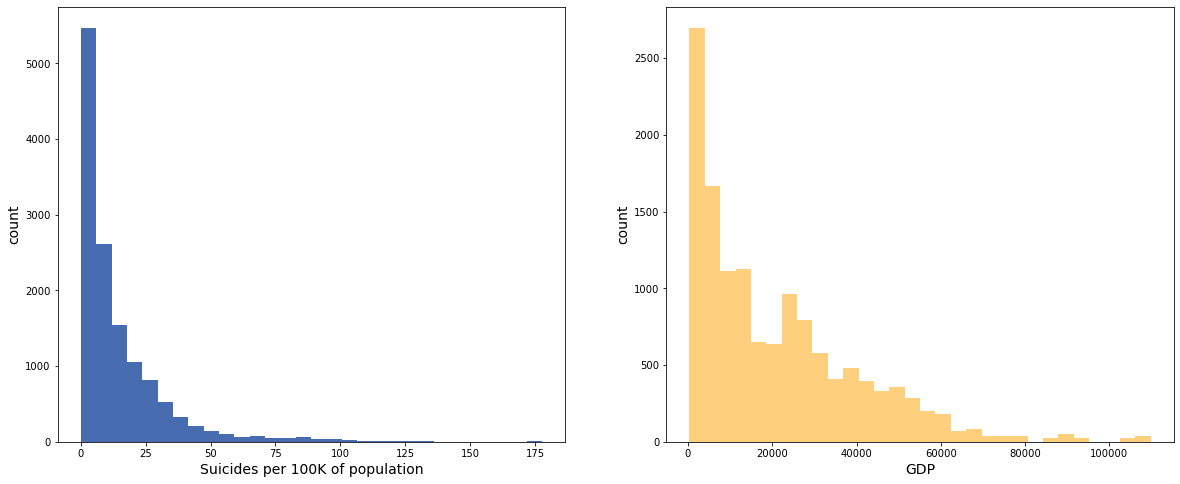

In [18]:
plt.figure(figsize=(20, 8))
plt.subplot(121)
plt.hist(df.sucid_in_hundredk, bins=30, color=col[18])
plt.xlabel('Suicides per 100K of population', fontsize=14)
plt.ylabel('count', fontsize=14)

plt.subplot(122)
plt.hist(df.gdp_per_capita, bins=30, color=col[7])
plt.xlabel('GDP', fontsize=14)
plt.ylabel('count', fontsize=14)

In [21]:
df.head()

,country,year,sex,age,suicides,population,sucid_in_hundredk,country-year,yearly_hdi,yearly_gdp,...,legalrights,laborforcetotal,lifeexpectancy,mobilesubscriptionsp100,refugees,selfemployed,electricityacess,secondarycompletion,continent,country_code
0,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,0.694,8.841667e+10,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Americas,ARG
1,Argentina,1985,male,55-74 years,485,1997000,24.29,Argentina1985,0.694,8.841667e+10,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Americas,ARG
2,Argentina,1985,male,35-54 years,414,3346300,12.37,Argentina1985,0.694,8.841667e+10,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Americas,ARG
3,Argentina,1985,female,55-74 years,210,2304000,9.11,Argentina1985,0.694,8.841667e+10,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Americas,ARG
4,Argentina,1985,male,25-34 years,177,2234200,7.92,Argentina1985,0.694,8.841667e+10,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Americas,ARG


<AxesSubplot:xlabel='gdp_per_capita', ylabel='suicides'>

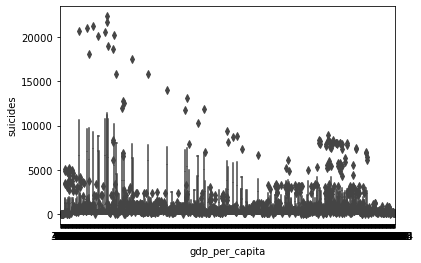

In [20]:
import seaborn as sns
sns.boxplot(x='gdp_per_capita', y='suicides', data=df   )